## Reaction Time - ANOVA One-Way Tests and Permutation Tests

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Data Preparation

In [15]:
# task dictionary
task_dict = {
    'stroop_vanilla': 'task-td7i',
    'stroop_progressbar': 'task-lupf',
    'stroop_eyes': 'task-c9op',
    'stroop_video': 'task-1l71',
    'stroop_posneg': 'task-on6n',
    'stroop_final': 'task-7g42',
    'stroop_bonus': 'task-3kpz',
    'rdk_vanilla': 'task-2ywa',
    'rdk_progressbar': 'task-sks3',
    'rdk_eyes': 'task-zyvq',
    'rdk_video': 'task-6e3k',
    'rdk_posneg': 'task-ivrk',
    'rdk_final': 'task-sq3v',
    'rdk_bonus': 'task-hvii',
    'bandit_vanilla': 'task-dwkr',
    'bandit_progressbar': 'task-25bt',
    'bandit_eyes': 'task-x158',
    'bandit_video': 'task-9ndm',
    'bandit_posneg': 'task-tzk1',
    'bandit_final': 'task-gn7s',
    'bandit_bonus': 'task-iaas',
}

# task-separated arrays
stroop_arr = ["stroop_vanilla", "stroop_progressbar", "stroop_eyes", "stroop_video", "stroop_posneg", "stroop_final", "stroop_bonus"]
rdk_arr = ["rdk_vanilla", "rdk_progressbar", "rdk_eyes", "rdk_video", "rdk_posneg", "rdk_final", "rdk_bonus"]
bandit_arr = ["bandit_vanilla", "bandit_progressbar", "bandit_eyes", "bandit_video", "bandit_posneg", "bandit_final", "bandit_bonus"]

In [16]:
stroop_df = pd.read_csv('data/stroop_df.csv')
rdk_df = pd.read_csv('data/rdk_df.csv')
bandit_df = pd.read_csv('data/bandit_df.csv')
rdk_df.head(40)

C:\Users\Devank\AppData\Local\Temp\ipykernel_256\901734954.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  stroop_df = pd.read_csv('data/stroop_df.csv')
C:\Users\Devank\AppData\Local\Temp\ipykernel_256\901734954.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  rdk_df = pd.read_csv('data/rdk_df.csv')
C:\Users\Devank\AppData\Local\Temp\ipykernel_256\901734954.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  bandit_df = pd.read_csv('data/bandit_df.csv')


,Unnamed: 0,Local Date,Tree Node Key,Participant Public ID,Participant Private ID,Participant Status,Checkpoint,Task Name,Trial Number,Screen Number,...,Reaction Time,Response Type,Response,Attempt,Correct,Incorrect,Timed Out,display,Stimulus,Answer
0,0,07/03/2023 10:11:09,task-2ywa,5ef9fa2c7f835a08989f1da8,8283587.0,complete,rdk-vanilla,random-dots-3-vanilla,BEGIN TASK,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
1,1,07/03/2023 10:11:23,task-2ywa,5ef9fa2c7f835a08989f1da8,8283587.0,complete,rdk-vanilla,random-dots-3-vanilla,1,1.0,...,13693.399999976158,NaN,NaN,NaN,0.0,1.0,NaN,fullscreen,NaN,NaN
2,2,07/03/2023 10:11:23,task-2ywa,5ef9fa2c7f835a08989f1da8,8283587.0,complete,rdk-vanilla,random-dots-3-vanilla,1,2.0,...,16.666000000001077,NaN,NaN,NaN,0.0,1.0,1.0,fullscreen,NaN,NaN
3,3,07/03/2023 10:11:27,task-2ywa,5ef9fa2c7f835a08989f1da8,8283587.0,complete,rdk-vanilla,random-dots-3-vanilla,1,1.0,...,4524.799999952316,NaN,NaN,NaN,0.0,1.0,NaN,instructions,NaN,NaN
4,4,07/03/2023 10:11:34,task-2ywa,5ef9fa2c7f835a08989f1da8,8283587.0,complete,rdk-vanilla,random-dots-3-vanilla,1,1.0,...,7299.708000000002,NaN,NaN,NaN,0.0,1.0,1.0,practise trials,coherence-30-dd.mp4,down
5,5,07/03/2023 10:11:37,task-2ywa,5ef9fa2c7f835a08989f1da8,8283587.0,complete,rdk-vanilla,random-dots-3-vanilla,1,2.0,...,3000.4429999999993,NaN,NaN,NaN,0.0,1.0,1.0,practise trials,coherence-30-dd.mp4,down
6,6,07/03/2023 10:11:38,task-2ywa,5ef9fa2c7f835a08989f1da8,8283587.0,complete,rdk-vanilla,random-dots-3-vanilla,1,3.0,...,499.97999999999956,NaN,NaN,NaN,0.0,1.0,1.0,practise trials,coherence-30-dd.mp4,down
7,7,07/03/2023 10:11:41,task-2ywa,5ef9fa2c7f835a08989f1da8,8283587.0,complete,rdk-vanilla,random-dots-3-vanilla,2,1.0,...,2646,NaN,up,1.0,0.0,1.0,NaN,practise trials,coherence-70-dd.mp4,down
8,8,07/03/2023 10:11:41,task-2ywa,5ef9fa2c7f835a08989f1da8,8283587.0,complete,rdk-vanilla,random-dots-3-vanilla,2,3.0,...,499.9800000000032,NaN,NaN,NaN,0.0,1.0,1.0,practise trials,coherence-70-dd.mp4,down
9,9,07/03/2023 10:11:42,task-2ywa,5ef9fa2c7f835a08989f1da8,8283587.0,complete,rdk-vanilla,random-dots-3-vanilla,3,1.0,...,1213.2999999523163,NaN,left,1.0,0.0,1.0,NaN,practise trials,coherence-30-rr.mp4,right


In [17]:
def rt_df_builder(df, arr, task):
    
    performance_df = pd.DataFrame(columns=['Participant', 'Task', 'Manipulation', 'RT', ])
    for manip in arr:

        focus_df = df[df['Tree Node Key'] == task_dict[manip]]
        participants = focus_df['Participant Private ID'].unique().tolist()
        
        for participant in participants:
            participant_df = focus_df[focus_df['Participant Private ID'] == participant]
            participant_df = participant_df[participant_df['Screen Name'] == 'trial'][['Reaction Time', 'Timed Out', 'Local Date']]
            
            # removing timed-out trials
            participant_df = participant_df[participant_df['Timed Out'].isna()]
            
            rt = participant_df['Reaction Time'].astype('float').sum() / len(participant_df)
            date = participant_df['Local Date'].iloc[0]
            performance_df = performance_df.append({
                'Participant': participant,
                'Task': task,
                'Manipulation': manip,
                'RT': rt,
                'Date': date
            }, ignore_index=True)
            
    return performance_df

In [18]:
def sample_equal_rows(df, column, count):
    
    new_df = pd.DataFrame(columns=df.columns)
    for value in df[column].unique():
        new_df = new_df.append(df[df[column] == value].sample(count))
    return new_df

In [19]:
stroop_rt_df = rt_df_builder(stroop_df, stroop_arr, "Stroop")
rdk_rt_df = rt_df_builder(rdk_df, rdk_arr, "RDK")
bandit_rt_df = rt_df_builder(bandit_df, bandit_arr, "Bandit")

performance_df = pd.concat([stroop_rt_df, rdk_rt_df, bandit_rt_df])
performance_df.reset_index(inplace=True)

In [22]:
stroop_rt_df['Date'] = pd.to_datetime(stroop_rt_df['Date'], format="%d/%m/%Y %H:%M:%S")
rdk_rt_df['Date'] = pd.to_datetime(rdk_rt_df['Date'], format="%d/%m/%Y %H:%M:%S")
bandit_rt_df['Date'] = pd.to_datetime(bandit_rt_df['Date'], format="%d/%m/%Y %H:%M:%S")
performance_df['Date'] = pd.to_datetime(performance_df['Date'], format="%d/%m/%Y %H:%M:%S")

#### I. Comparing different tasks across manipulations

$H_0$: The mean performance of participants is statisitically similar for all three tasks (Stroop, RDK, bandit).

$H_a$: The mean performance of participants is significantly dissimilar for different tasks.

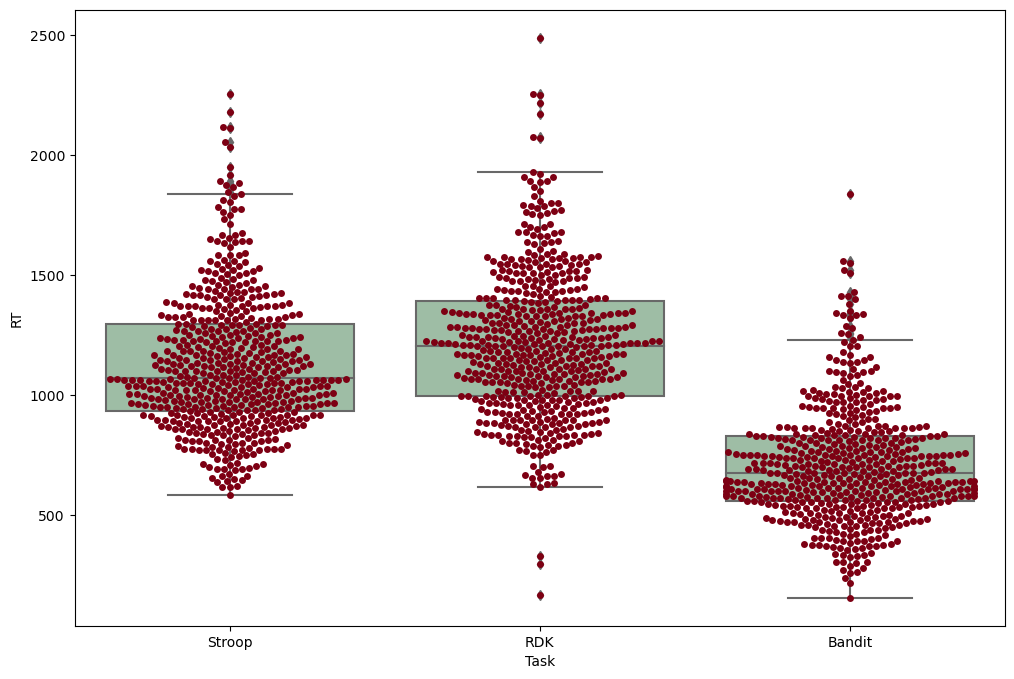

In [108]:
task_min_count = min(performance_df["Task"].value_counts())
task_performance_df = sample_equal_rows(performance_df, "Task", task_min_count)

fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Task', y='RT', data=task_performance_df, color='#99c2a2')
ax = sns.swarmplot(x="Task", y="RT", data=task_performance_df, color='#7d0013')
# ax = sns.violinplot(x="Task", y="RT", data=task_performance_df, color='#7d0013')

plt.show()

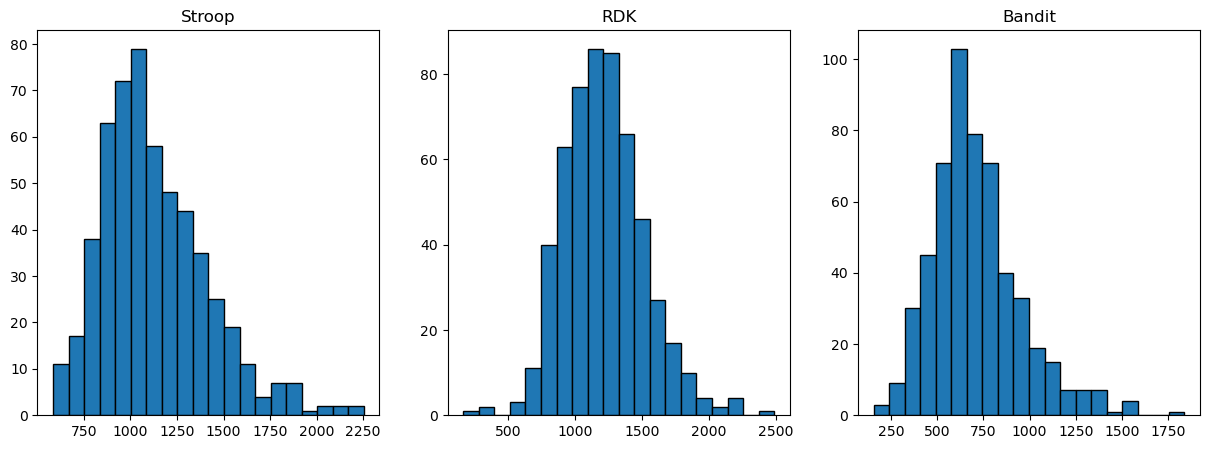

In [109]:
# fig = sm.qqplot(task_performance_df[task_performance_df["Task"] == "Stroop"]["Accuracy"], line='45')
fig = plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.hist(task_performance_df[task_performance_df["Task"] == "Stroop"]["RT"], edgecolor='black', bins=20)
plt.title("Stroop")
plt.subplot(1,3,2)
plt.hist(task_performance_df[task_performance_df["Task"] == "RDK"]["RT"], edgecolor='black', bins=20)
plt.title("RDK")
plt.subplot(1,3,3)
plt.hist(task_performance_df[task_performance_df["Task"] == "Bandit"]["RT"], edgecolor='black', bins=20)
plt.title("Bandit")
plt.show()

In [110]:
model1 = ols('RT ~ Task', data=task_performance_df).fit()
# test for normality - FAILED
print(stats.shapiro(model1.resid))


ShapiroResult(statistic=0.9685586094856262, pvalue=2.1003873511523048e-18)


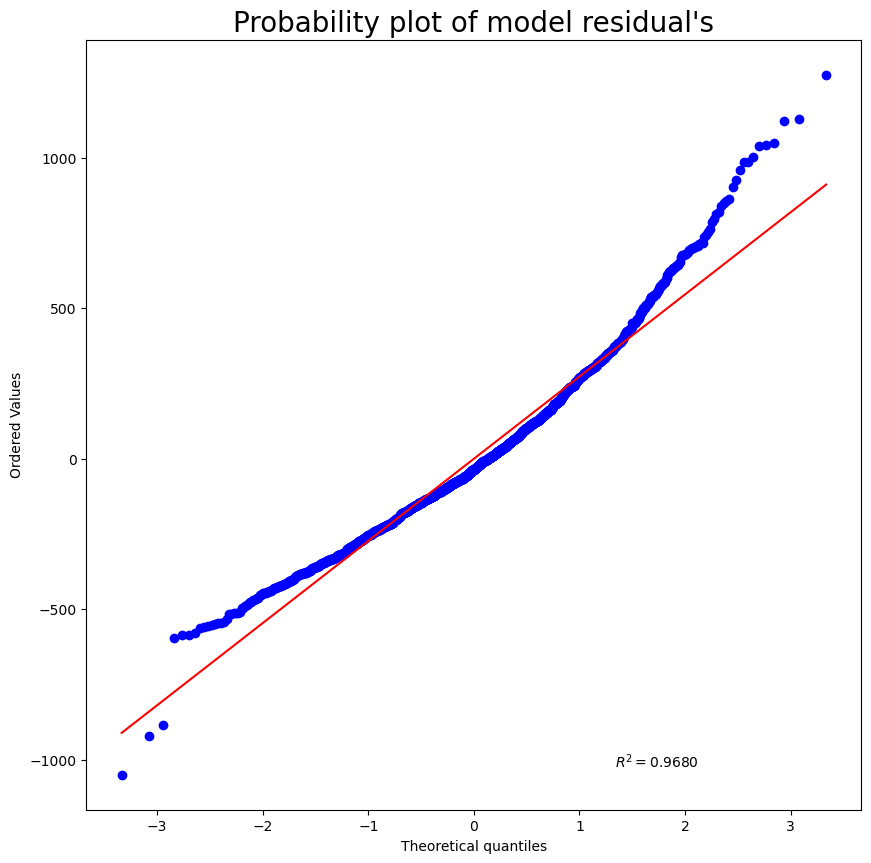

In [111]:
# another test for normality

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model1.resid, plot=plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [112]:
anova_table = sm.stats.anova_lm(model1, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Task,7.961472e+07,2.0,518.015817,6.424077e-175
Residual,1.254124e+08,1632.0,NaN,NaN


###### How to interpret these results?

#### II. Comparing different manipulations across tasks

$H_0$: The mean performance of participants is statisitically similar for all seven manipulations.

$H_a$: The mean performance of participants is significantly dissimilar for different manipulations.

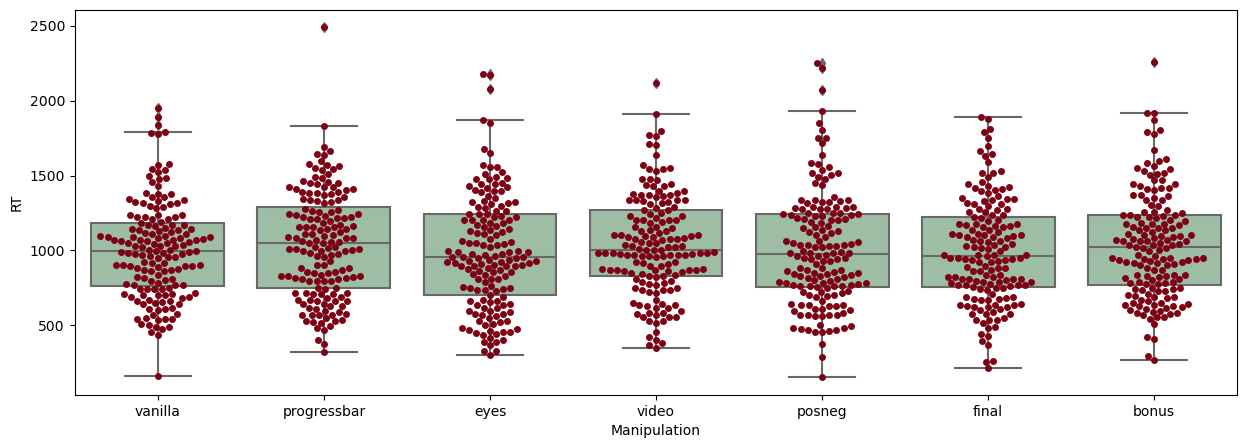

In [113]:
manip_performance_df = performance_df
manip_performance_df = manip_performance_df.replace('rdk_', '', regex=True)
manip_performance_df = manip_performance_df.replace('stroop_', '', regex=True)
manip_performance_df = manip_performance_df.replace('bandit_', '', regex=True)

manip_min_count = min(manip_performance_df["Manipulation"].value_counts())
manip_performance_df = sample_equal_rows(manip_performance_df, "Manipulation", manip_min_count)

fig = plt.figure(figsize=(15,5))
ax = sns.boxplot(x='Manipulation', y='RT', data=manip_performance_df, color='#99c2a2')
ax = sns.swarmplot(x="Manipulation", y="RT", data=manip_performance_df, color='#7d0013')
plt.show()

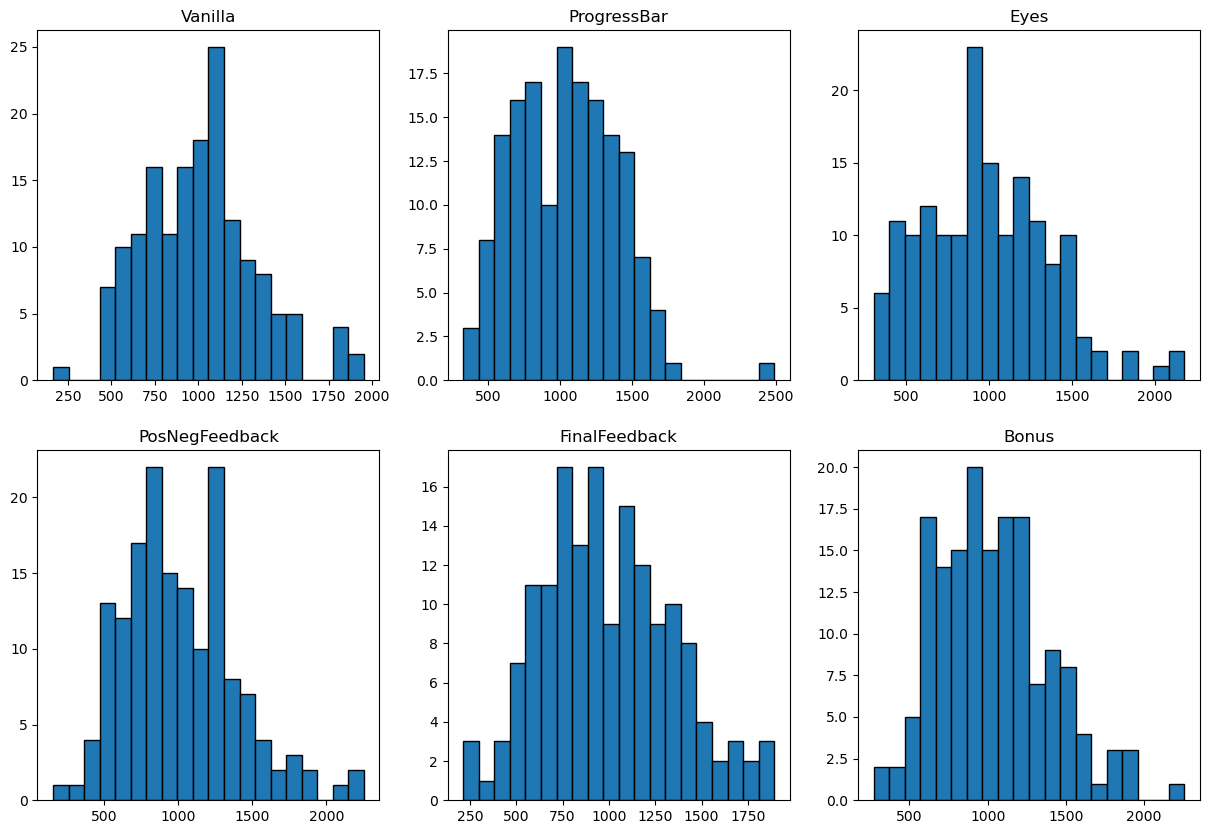

In [114]:
fig = plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
plt.hist(manip_performance_df[manip_performance_df["Manipulation"] == "vanilla"]["RT"], edgecolor='black', bins=20)
plt.title("Vanilla")
plt.subplot(2,3,2)
plt.hist(manip_performance_df[manip_performance_df["Manipulation"] == "progressbar"]["RT"], edgecolor='black', bins=20)
plt.title("ProgressBar")
plt.subplot(2,3,3)
plt.hist(manip_performance_df[manip_performance_df["Manipulation"] == "eyes"]["RT"], edgecolor='black', bins=20)
plt.title("Eyes")
plt.subplot(2,3,4)
plt.hist(manip_performance_df[manip_performance_df["Manipulation"] == "posneg"]["RT"], edgecolor='black', bins=20)
plt.title("PosNegFeedback")
plt.subplot(2,3,5)
plt.hist(manip_performance_df[manip_performance_df["Manipulation"] == "final"]["RT"], edgecolor='black', bins=20)
plt.title("FinalFeedback")
plt.subplot(2,3,6)
plt.hist(manip_performance_df[manip_performance_df["Manipulation"] == "bonus"]["RT"], edgecolor='black', bins=20)
plt.title("Bonus")
plt.show()

In [115]:
model2 = ols('RT ~ Manipulation', data=manip_performance_df).fit()
print(stats.shapiro(model2.resid))

ShapiroResult(statistic=0.9858003258705139, pvalue=5.621271004230266e-09)


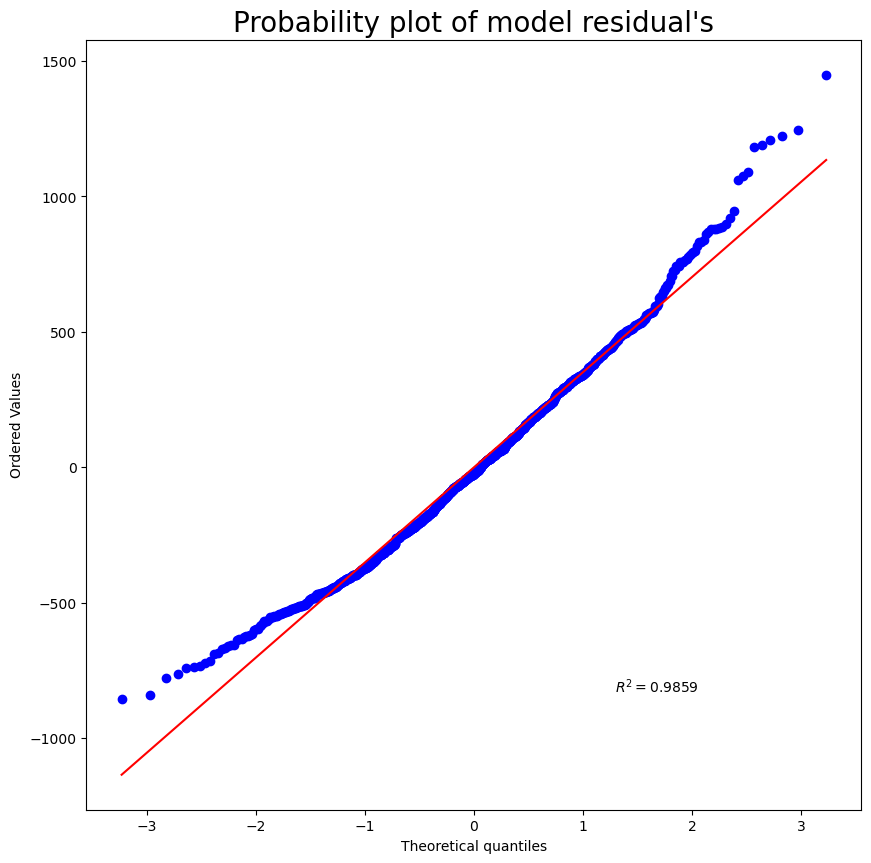

In [116]:
# another test for normality

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model2.resid, plot=plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [117]:
anova_table = sm.stats.anova_lm(model2, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Manipulation,4.728956e+05,6.0,0.628886,0.707269
Residual,1.394881e+08,1113.0,NaN,NaN


### WITHIN TASK ANOVAs

#### I. Stroop

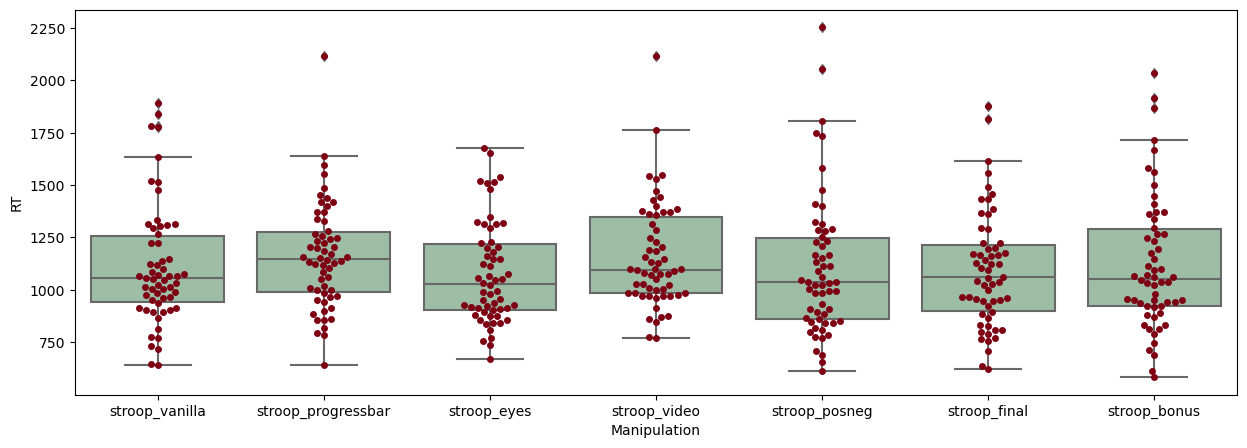

In [118]:
stroop_performance_df = performance_df[performance_df["Task"] == "Stroop"]
stroop_performance_df = sample_equal_rows(stroop_performance_df, "Manipulation", min(stroop_performance_df["Manipulation"].value_counts()))

fig = plt.figure(figsize=(15,5))
ax = sns.boxplot(x='Manipulation', y='RT', data=stroop_performance_df, color='#99c2a2')
ax = sns.swarmplot(x="Manipulation", y="RT", data=stroop_performance_df, color='#7d0013')
plt.show()

In [119]:
model3 = ols('RT ~ Manipulation', data=stroop_performance_df).fit()
print(stats.shapiro(model3.resid))

ShapiroResult(statistic=0.9423255324363708, pvalue=1.854321383942814e-11)


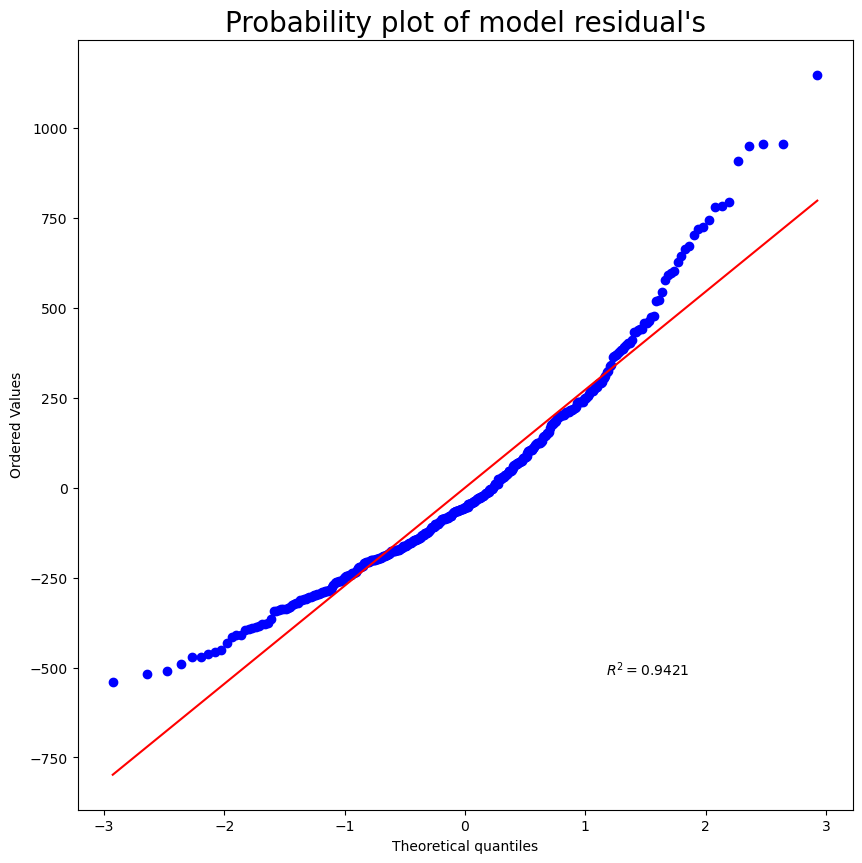

In [120]:
# another test for normality

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model3.resid, plot=plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [121]:
anova_table = sm.stats.anova_lm(model3, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Manipulation,3.534034e+05,6.0,0.743301,0.61505
Residual,3.161753e+07,399.0,NaN,NaN


#### II. RDK

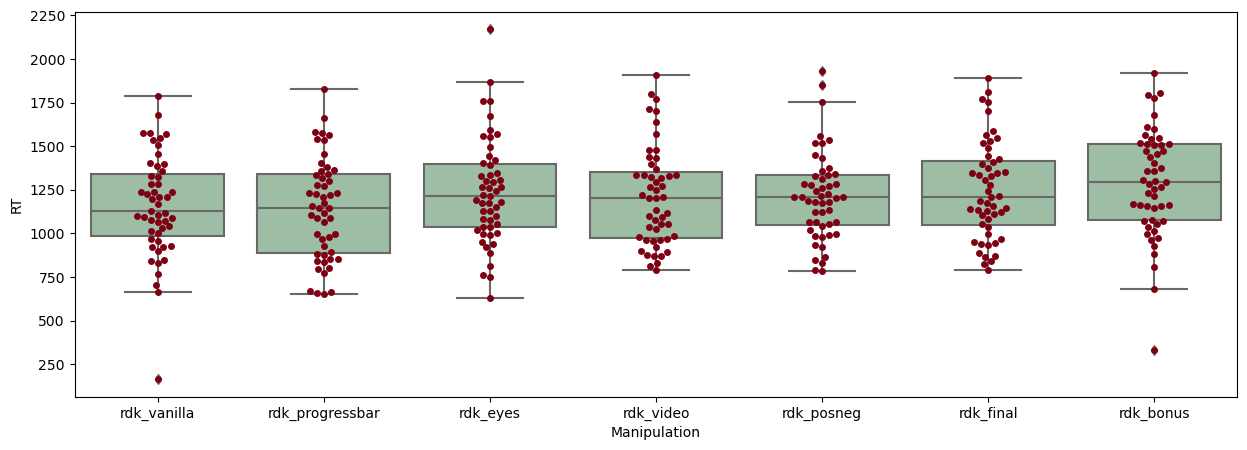

In [122]:
rdk_performance_df = performance_df[performance_df["Task"] == "RDK"]
rdk_performance_df = sample_equal_rows(rdk_performance_df, "Manipulation", min(rdk_performance_df["Manipulation"].value_counts()))

fig = plt.figure(figsize=(15,5))
ax = sns.boxplot(x='Manipulation', y='RT', data=rdk_performance_df, color='#99c2a2')
ax = sns.swarmplot(x="Manipulation", y="RT", data=rdk_performance_df, color='#7d0013')
plt.show()

In [123]:
model4 = ols('RT ~ Manipulation', data=rdk_performance_df).fit()
print(stats.shapiro(model4.resid))

ShapiroResult(statistic=0.990336000919342, pvalue=0.01897459104657173)


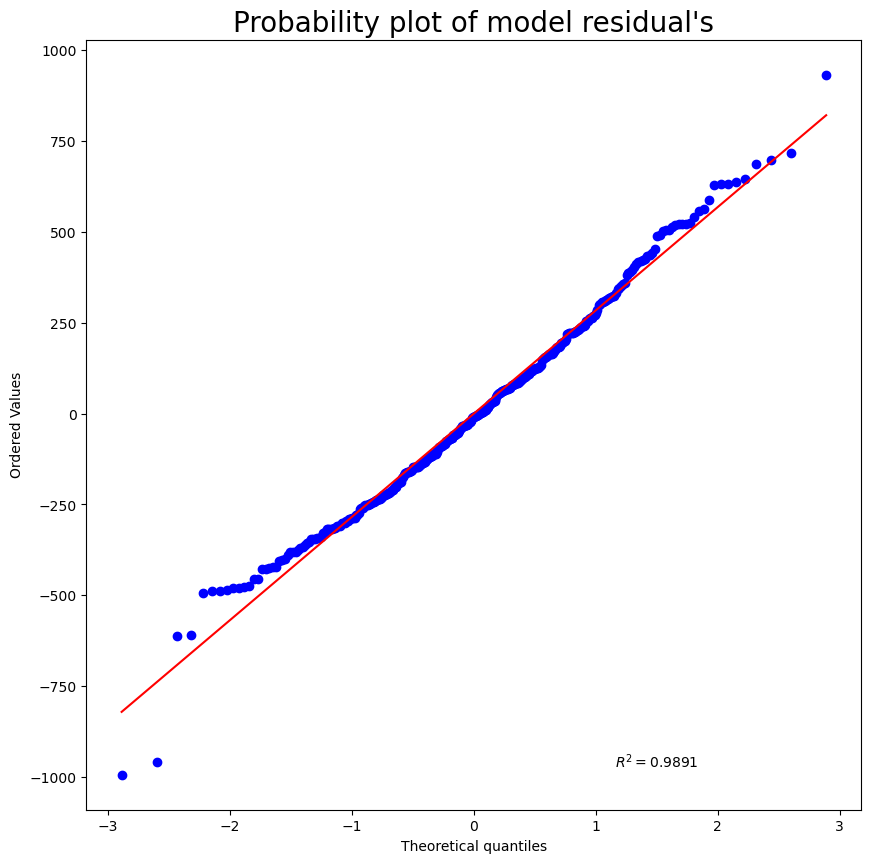

In [124]:
# another test for normality

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model4.resid, plot=plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [125]:
anova_table = sm.stats.anova_lm(model4, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Manipulation,7.983250e+05,6.0,1.619495,0.140698
Residual,2.875523e+07,350.0,NaN,NaN


#### III. Bandit

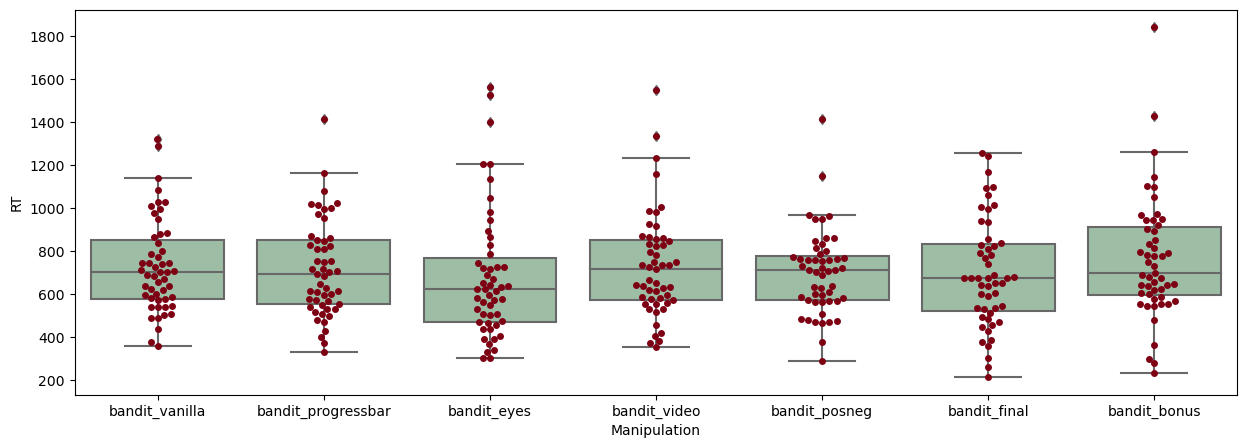

In [126]:
bandit_performance_df = performance_df[performance_df["Task"] == "Bandit"]
bandit_performance_df = sample_equal_rows(bandit_performance_df, "Manipulation", min(bandit_performance_df["Manipulation"].value_counts()))

fig = plt.figure(figsize=(15,5))
ax = sns.boxplot(x='Manipulation', y='RT', data=bandit_performance_df, color='#99c2a2')
ax = sns.swarmplot(x="Manipulation", y="RT", data=bandit_performance_df, color='#7d0013')
plt.show()

In [127]:
model5 = ols('RT ~ Manipulation', data=bandit_performance_df).fit()
print(stats.shapiro(model5.resid))

ShapiroResult(statistic=0.9493137001991272, pvalue=9.996389271904604e-10)


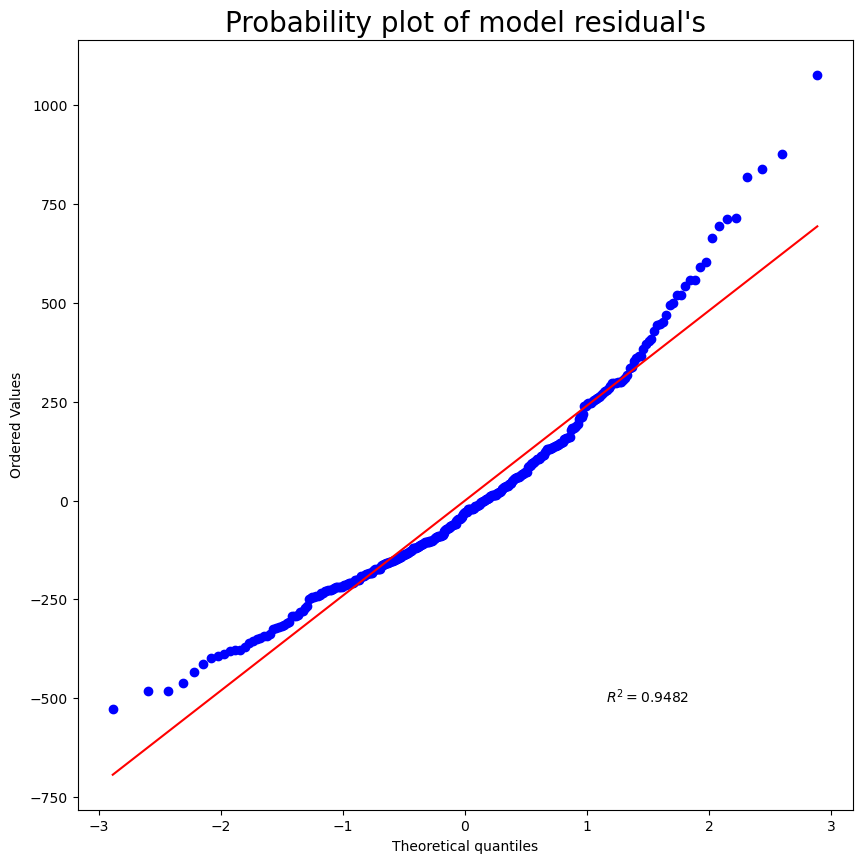

In [128]:
# another test for normality

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model5.resid, plot=plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [129]:
anova_table = sm.stats.anova_lm(model5, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Manipulation,2.150911e+05,6.0,0.585278,0.742095
Residual,2.143763e+07,350.0,NaN,NaN


## Permutation Tests

Let's see how this goes.

In [130]:
def statistic(x, y):
    return (np.mean(x) - np.mean(y))

In [131]:
# comparing between two tasks

x = np.asarray(performance_df[performance_df["Task"] == "Stroop"][["RT"]])
y = np.asarray(performance_df[performance_df["Task"] == "RDK"][["RT"]])
z = np.asarray(performance_df[performance_df["Task"] == "Bandit"][["RT"]])

print(statistic(x, y))
print(statistic(y, z))
print(statistic(z, x))


-83.12940965066309
503.38329438465723
-420.25388473399414


In [132]:
res = stats.permutation_test((x, y), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-83.12940965]
[0.00019998]


In [133]:
res = stats.permutation_test((y, z), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[503.38329438]
[0.00019998]


In [134]:
res = stats.permutation_test((z, x), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-420.25388473]
[0.00019998]


All these permutation tests reject the null hypotheses. Therefore, we can say that the main effect of tasks is pairwise significant.

#### Permutation tests for manipulations

In [135]:
manip_1 = performance_df[performance_df["Manipulation"].str.contains("vanilla")]
manip_2 = performance_df[performance_df["Manipulation"].str.contains("progress")]
manip_3 = performance_df[performance_df["Manipulation"].str.contains("eyes")]
manip_4 = performance_df[performance_df["Manipulation"].str.contains("posneg")]
manip_5 = performance_df[performance_df["Manipulation"].str.contains("final")]
manip_6 = performance_df[performance_df["Manipulation"].str.contains("bonus")]
manip_7 = performance_df[performance_df["Manipulation"].str.contains("video")]

##### Stroop

In [136]:
str_manip_1 = manip_1[manip_1["Task"] == "Stroop"][["RT"]]
str_manip_2 = manip_2[manip_2["Task"] == "Stroop"][["RT"]]
str_manip_3 = manip_3[manip_3["Task"] == "Stroop"][["RT"]]
str_manip_4 = manip_4[manip_4["Task"] == "Stroop"][["RT"]]
str_manip_5 = manip_5[manip_5["Task"] == "Stroop"][["RT"]]
str_manip_6 = manip_6[manip_6["Task"] == "Stroop"][["RT"]]
str_manip_7 = manip_7[manip_7["Task"] == "Stroop"][["RT"]]

print(len(str_manip_7))

58


In [137]:
# vanilla vs progress-bar
res = stats.permutation_test((str_manip_1, str_manip_2), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-71.12299031]
[0.10518948]


In [138]:
# vanilla vs eyes
res = stats.permutation_test((str_manip_1, str_manip_3), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[7.67675587]
[0.88231177]


In [139]:
# vanilla vs posneg
res = stats.permutation_test((str_manip_1, str_manip_4), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-16.48152939]
[0.73632637]


In [140]:
# vanilla vs final
res = stats.permutation_test((str_manip_1, str_manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-4.63059697]
[0.91270873]


In [141]:
# vanilla vs bonus
res = stats.permutation_test((str_manip_1, str_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[2.45407705]
[0.94390561]


In [142]:
# vanilla vs video
res = stats.permutation_test((str_manip_1, str_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-46.68019146]
[0.31736826]


In [143]:
# progress-bar vs eyes
res = stats.permutation_test((str_manip_2, str_manip_3), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[78.79974618]
[0.07639236]


In [144]:
# progress-bar vs posneg
res = stats.permutation_test((str_manip_2, str_manip_4), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[54.64146092]
[0.2449755]


In [145]:
# progress-bar vs final
res = stats.permutation_test((str_manip_2, str_manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[66.49239335]
[0.11338866]


In [146]:
# progress-bar vs bonus
res = stats.permutation_test((str_manip_2, str_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[73.57706736]
[0.09239076]


In [147]:
# progress-bar vs video
res = stats.permutation_test((str_manip_2, str_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[24.44279886]
[0.57554245]


In [148]:
# eyes vs posneg
res = stats.permutation_test((str_manip_3, str_manip_4), statistic, vectorized=False, n_resamples=1e4)#, alternative='less')
print(res.statistic)
print(res.pvalue)

[-24.15828526]
[0.62833717]


In [149]:
# eyes vs final
res = stats.permutation_test((str_manip_3, str_manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-12.30735283]
[0.77612239]


In [150]:
# eyes vs bonus
res = stats.permutation_test((str_manip_3, str_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-5.22267882]
[0.91070893]


In [151]:
# eyes vs video
res = stats.permutation_test((str_manip_3, str_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-54.35694732]
[0.25037496]


In [152]:
# posneg vs final
res = stats.permutation_test((str_manip_4, str_manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[11.85093242]
[0.78912109]


In [153]:
# posneg vs bonus
res = stats.permutation_test((str_manip_4, str_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[18.93560644]
[0.68733127]


In [154]:
# posneg vs video
res = stats.permutation_test((str_manip_4, str_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-30.19866207]
[0.54514549]


In [155]:
# final vs bonus
res = stats.permutation_test((str_manip_5, str_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[7.08467401]
[0.85971403]


In [156]:
# final vs video
res = stats.permutation_test((str_manip_5, str_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-42.04959449]
[0.34536546]


In [157]:
# bonus vs video
res = stats.permutation_test((str_manip_6, str_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-49.1342685]
[0.29457054]


##### RDK

In [158]:
rdk_manip_1 = manip_1[manip_1["Task"] == "RDK"][["RT"]]
rdk_manip_2 = manip_2[manip_2["Task"] == "RDK"][["RT"]]
rdk_manip_3 = manip_3[manip_3["Task"] == "RDK"][["RT"]]
rdk_manip_4 = manip_4[manip_4["Task"] == "RDK"][["RT"]]
rdk_manip_5 = manip_5[manip_5["Task"] == "RDK"][["RT"]]
rdk_manip_6 = manip_6[manip_6["Task"] == "RDK"][["RT"]]
rdk_manip_7 = manip_7[manip_7["Task"] == "RDK"][["RT"]]

print(len(rdk_manip_7))

51


In [159]:
# vanilla vs progress-bar
res = stats.permutation_test((rdk_manip_1, rdk_manip_2), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-21.52781166]
[0.65573443]


In [160]:
# vanilla vs eyes
res = stats.permutation_test((rdk_manip_1, rdk_manip_3), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-50.47379692]
[0.26737326]


In [161]:
# vanilla vs posneg
res = stats.permutation_test((rdk_manip_1, rdk_manip_4), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-106.38575646]
[0.0229977]


In [162]:
# vanilla vs final
res = stats.permutation_test((rdk_manip_1, rdk_manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-66.16907216]
[0.15118488]


In [163]:
# vanilla vs bonus
res = stats.permutation_test((rdk_manip_1, rdk_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-67.10394528]
[0.13738626]


In [164]:
# vanilla vs video
res = stats.permutation_test((rdk_manip_1, rdk_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-49.9434042]
[0.31416858]


In [165]:
# progress-bar vs eyes
res = stats.permutation_test((rdk_manip_2, rdk_manip_3), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-28.94598526]
[0.53334667]


In [166]:
# progress-bar vs posneg
res = stats.permutation_test((rdk_manip_2, rdk_manip_4), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-84.8579448]
[0.0819918]


In [167]:
# progress-bar vs final
res = stats.permutation_test((rdk_manip_2, rdk_manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-44.64126049]
[0.34636536]


In [168]:
# progress-bar vs bonus
res = stats.permutation_test((rdk_manip_2, rdk_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-45.57613362]
[0.34416558]


In [169]:
# progress-bar vs video
res = stats.permutation_test((rdk_manip_2, rdk_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-28.41559253]
[0.61393861]


In [170]:
# eyes vs posneg
res = stats.permutation_test((rdk_manip_3, rdk_manip_4), statistic, vectorized=False, n_resamples=1e4)#, alternative='less')
print(res.statistic)
print(res.pvalue)

[-55.91195954]
[0.2449755]


In [171]:
# eyes vs final
res = stats.permutation_test((rdk_manip_3, rdk_manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-15.69527523]
[0.75672433]


In [172]:
# eyes vs bonus
res = stats.permutation_test((rdk_manip_3, rdk_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-16.63014836]
[0.73452655]


In [173]:
# eyes vs video
res = stats.permutation_test((rdk_manip_3, rdk_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[0.53039272]
[0.99530047]


In [174]:
# posneg vs final
res = stats.permutation_test((rdk_manip_4, rdk_manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[40.21668431]
[0.39936006]


In [175]:
# posneg vs bonus
res = stats.permutation_test((rdk_manip_4, rdk_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[39.28181118]
[0.41935806]


In [176]:
# posneg vs video
res = stats.permutation_test((rdk_manip_4, rdk_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[56.44235226]
[0.2969703]


In [177]:
# final vs bonus
res = stats.permutation_test((rdk_manip_5, rdk_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-0.93487312]
[0.98150185]


In [178]:
# final vs video
res = stats.permutation_test((rdk_manip_5, rdk_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[16.22566796]
[0.75752425]


In [179]:
# bonus vs video
res = stats.permutation_test((rdk_manip_6, rdk_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[17.16054108]
[0.76092391]


##### Bandit

In [180]:
bandit_manip_1 = manip_1[manip_1["Task"] == "Bandit"][["RT"]]
bandit_manip_2 = manip_2[manip_2["Task"] == "Bandit"][["RT"]]
bandit_manip_3 = manip_3[manip_3["Task"] == "Bandit"][["RT"]]
bandit_manip_4 = manip_4[manip_4["Task"] == "Bandit"][["RT"]]
bandit_manip_5 = manip_5[manip_5["Task"] == "Bandit"][["RT"]]
bandit_manip_6 = manip_6[manip_6["Task"] == "Bandit"][["RT"]]
bandit_manip_7 = manip_7[manip_7["Task"] == "Bandit"][["RT"]]

print(len(bandit_manip_7))

51


In [181]:
# vanilla vs progress-bar
res = stats.permutation_test((bandit_manip_1, bandit_manip_2), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[22.02697767]
[0.48815118]


In [182]:
# vanilla vs eyes
res = stats.permutation_test((bandit_manip_1, bandit_manip_3), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[65.20137598]
[0.0869913]


In [183]:
# vanilla vs posneg
res = stats.permutation_test((bandit_manip_1, bandit_manip_4), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[25.74100179]
[0.48155184]


In [184]:
# vanilla vs final
res = stats.permutation_test((bandit_manip_1, bandit_manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[34.49304418]
[0.33456654]


In [185]:
# vanilla vs bonus
res = stats.permutation_test((bandit_manip_1, bandit_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[15.2247105]
[0.67033297]


In [186]:
# vanilla vs video
res = stats.permutation_test((bandit_manip_1, bandit_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[5.67880667]
[0.88691131]


In [187]:
# progress-bar vs eyes
res = stats.permutation_test((bandit_manip_2, bandit_manip_3), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[43.17439831]
[0.26777322]


In [188]:
# progress-bar vs posneg
res = stats.permutation_test((bandit_manip_2, bandit_manip_4), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[3.71402413]
[0.90450955]


In [189]:
# progress-bar vs final
res = stats.permutation_test((bandit_manip_2, bandit_manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[12.46606651]
[0.71292871]


In [190]:
# progress-bar vs bonus
res = stats.permutation_test((bandit_manip_2, bandit_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-6.80226717]
[0.86211379]


In [191]:
# progress-bar vs video
res = stats.permutation_test((bandit_manip_2, bandit_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-16.348171]
[0.66973303]


In [192]:
# eyes vs posneg
res = stats.permutation_test((bandit_manip_3, bandit_manip_4), statistic, vectorized=False, n_resamples=1e4)#, alternative='less')
print(res.statistic)
print(res.pvalue)

[-39.46037419]
[0.3279672]


In [193]:
# eyes vs final
res = stats.permutation_test((bandit_manip_3, bandit_manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-30.7083318]
[0.44735526]


In [194]:
# eyes vs bonus
res = stats.permutation_test((bandit_manip_3, bandit_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-49.97666548]
[0.23457654]


In [195]:
# eyes vs video
res = stats.permutation_test((bandit_manip_3, bandit_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-59.52256931]
[0.20377962]


In [196]:
# posneg vs final
res = stats.permutation_test((bandit_manip_4, bandit_manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[8.75204239]
[0.81011899]


In [197]:
# posneg vs bonus
res = stats.permutation_test((bandit_manip_4, bandit_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-10.51629129]
[0.79512049]


In [198]:
# posneg vs video
res = stats.permutation_test((bandit_manip_4, bandit_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-20.06219513]
[0.64313569]


In [199]:
# final vs bonus
res = stats.permutation_test((bandit_manip_5, bandit_manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-19.26833368]
[0.62973703]


In [200]:
# final vs video
res = stats.permutation_test((bandit_manip_5, bandit_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-28.81423752]
[0.51794821]


In [201]:
# bonus vs video
res = stats.permutation_test((bandit_manip_6, bandit_manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-9.54590383]
[0.83191681]


##### Manipulation-wise permutations (task-agnostic)

In [202]:
#re-doing this assignment for readability

manip_1 = performance_df[performance_df["Manipulation"].str.contains("vanilla")][["RT"]]
manip_2 = performance_df[performance_df["Manipulation"].str.contains("progress")][["RT"]]
manip_3 = performance_df[performance_df["Manipulation"].str.contains("eyes")][["RT"]]
manip_4 = performance_df[performance_df["Manipulation"].str.contains("posneg")][["RT"]]
manip_5 = performance_df[performance_df["Manipulation"].str.contains("final")][["RT"]]
manip_6 = performance_df[performance_df["Manipulation"].str.contains("bonus")][["RT"]]
manip_7 = performance_df[performance_df["Manipulation"].str.contains("video")][["RT"]]

print(manip_3.head())

              RT
157  1162.749215
158  1125.182292
159   956.074346
160   962.352632
161  1230.161257


In [203]:
# vanilla vs progress-bar
res = stats.permutation_test((manip_1, manip_2), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-25.99815358]
[0.38276172]


In [204]:
# vanilla vs eyes
res = stats.permutation_test((manip_1, manip_3), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[4.79642315]
[0.90430957]


In [205]:
# vanilla vs posneg
res = stats.permutation_test((manip_1, manip_4), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-32.21965356]
[0.31816818]


In [206]:
# vanilla vs final
res = stats.permutation_test((manip_1, manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-13.09816332]
[0.67213279]


In [207]:
# vanilla vs bonus
res = stats.permutation_test((manip_1, manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-19.949329]
[0.52274773]


In [208]:
# vanilla vs video
res = stats.permutation_test((manip_1, manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-38.95730837]
[0.23637636]


In [209]:
# progress-bar vs eyes
res = stats.permutation_test((manip_2, manip_3), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[30.79457673]
[0.34856514]


In [210]:
# progress-bar vs posneg
res = stats.permutation_test((manip_2, manip_4), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-6.22149998]
[0.86631337]


In [211]:
# progress-bar vs final
res = stats.permutation_test((manip_2, manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[12.89999026]
[0.68893111]


In [212]:
# progress-bar vs bonus
res = stats.permutation_test((manip_2, manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[6.04882458]
[0.86031397]


In [213]:
# progress-bar vs video
res = stats.permutation_test((manip_2, manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-12.95915479]
[0.68333167]


In [214]:
# eyes vs posneg
res = stats.permutation_test((manip_3, manip_4), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-37.01607671]
[0.2759724]


In [215]:
# eyes vs final
res = stats.permutation_test((manip_3, manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-17.89458647]
[0.59654035]


In [216]:
# eyes vs bonus
res = stats.permutation_test((manip_3, manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-24.74575215]
[0.4719528]


In [217]:
# eyes vs video
res = stats.permutation_test((manip_3, manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-43.75373152]
[0.23317668]


In [218]:
# posneg vs final
res = stats.permutation_test((manip_4, manip_5), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[19.12149024]
[0.57014299]


In [219]:
# posneg vs bonus
res = stats.permutation_test((manip_4, manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[12.27032456]
[0.71312869]


In [220]:
# posneg vs video
res = stats.permutation_test((manip_4, manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-6.73765481]
[0.85611439]


In [221]:
# final vs bonus
res = stats.permutation_test((manip_5, manip_6), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-6.85116568]
[0.82311769]


In [222]:
# final vs video
res = stats.permutation_test((manip_5, manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-25.85914505]
[0.46155384]


In [223]:
# bonus vs video
res = stats.permutation_test((manip_6, manip_7), statistic, vectorized=False, n_resamples=1e4)
print(res.statistic)
print(res.pvalue)

[-19.00797937]
[0.57894211]


## Performance across days

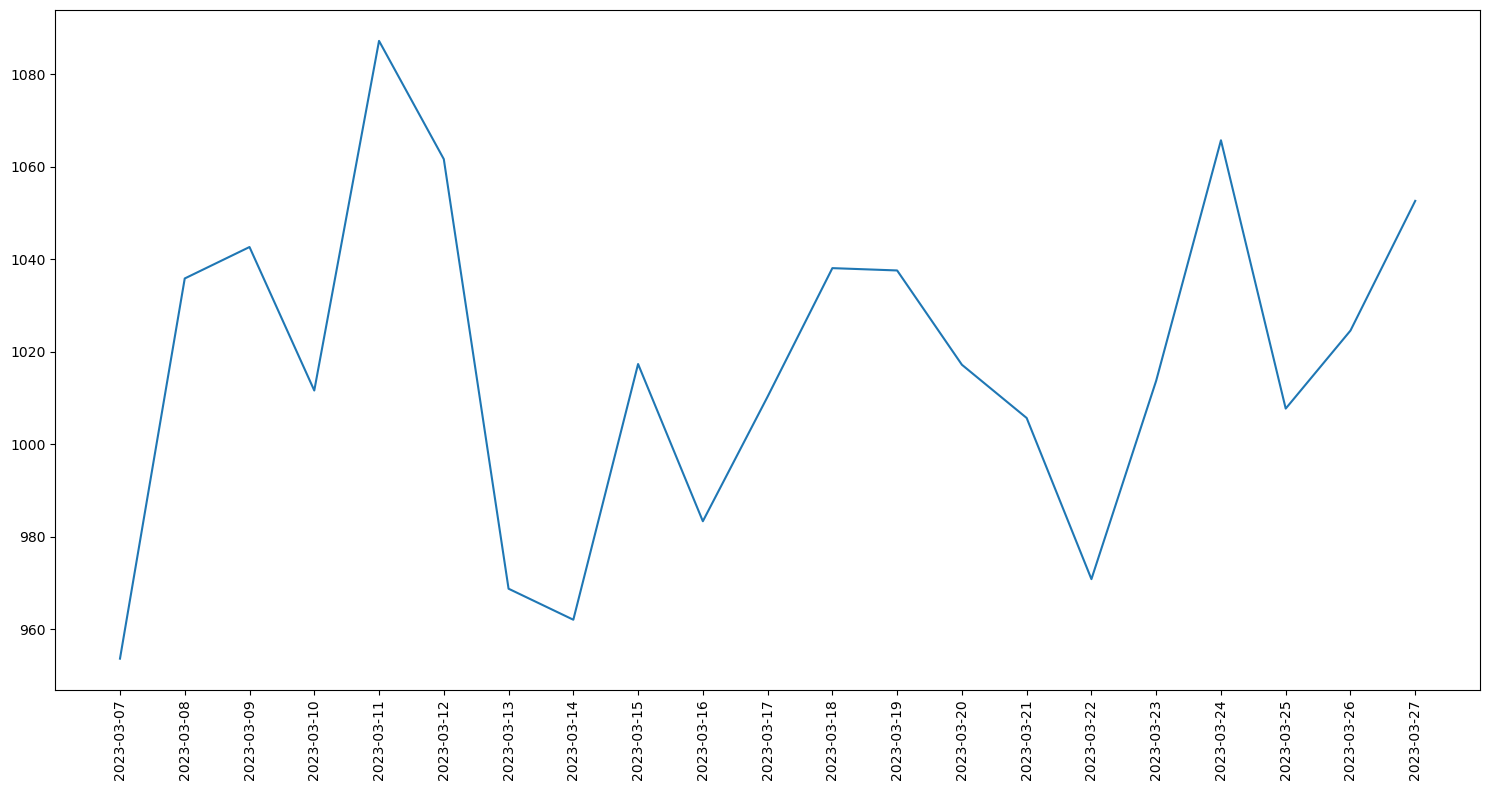

In [26]:
# overall

fig = plt.figure(figsize=(15, 8))
performance_df_grouped = performance_df.groupby([performance_df['Date'].dt.date])['RT'].mean().reset_index()
performance_df_grouped['Date'] = pd.to_datetime(performance_df_grouped['Date'])
plt.plot(performance_df_grouped['Date'], performance_df_grouped['RT'])
plt.xticks(performance_df_grouped['Date'], rotation=90)

fig.tight_layout()


### Days of the week (Monday = 0 ... Sunday = 6)

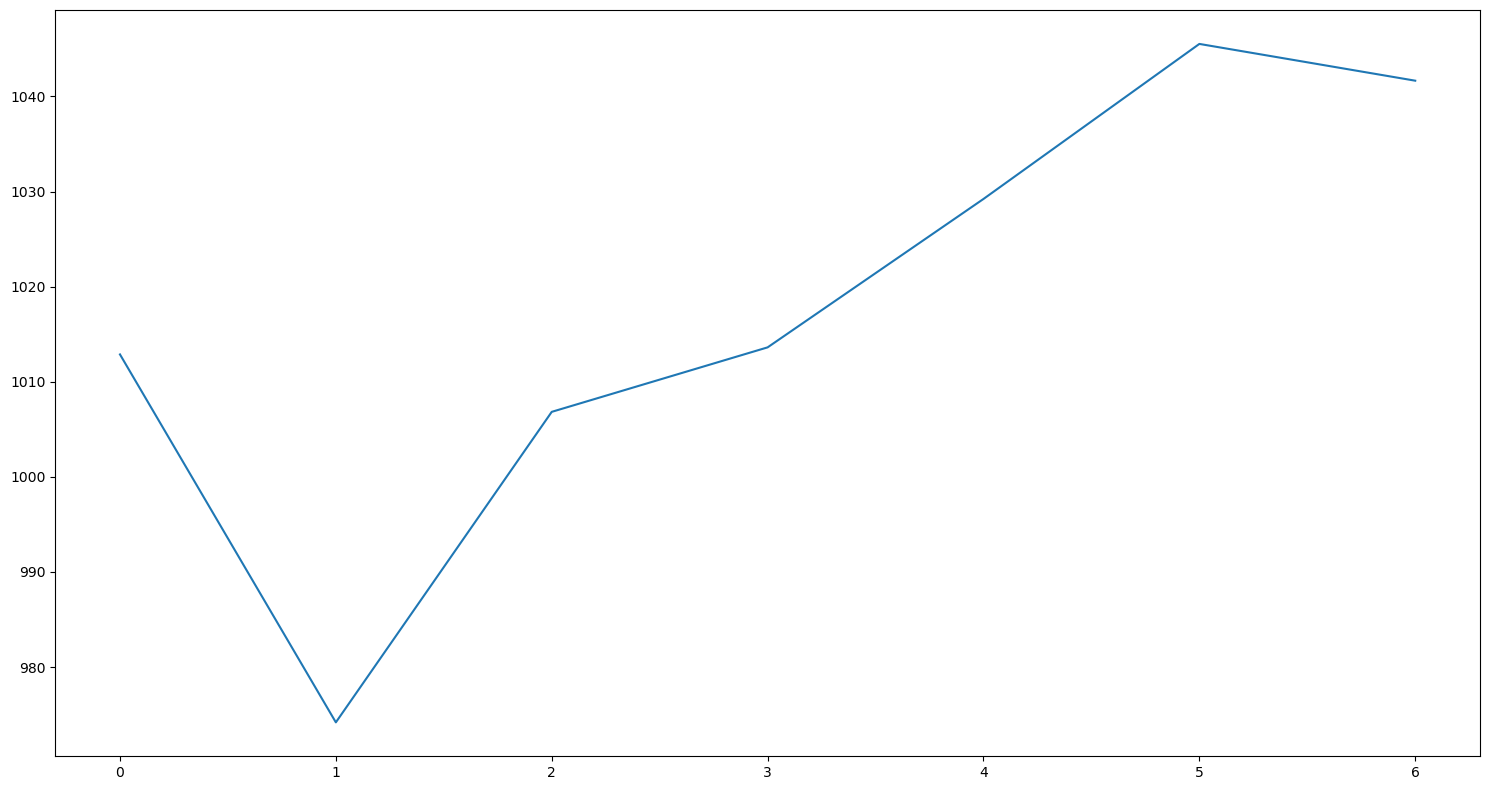

In [25]:
fig = plt.figure(figsize=(15, 8))

performance_df['Day'] = performance_df['Date'].dt.dayofweek
performance_df_grouped = performance_df.groupby([performance_df['Day']])['RT'].mean().reset_index()
plt.plot(performance_df_grouped['Day'], performance_df_grouped['RT'])
plt.xticks(performance_df_grouped['Day'])
plt.title("Overall - Day of Week (RT)")
fig.tight_layout()

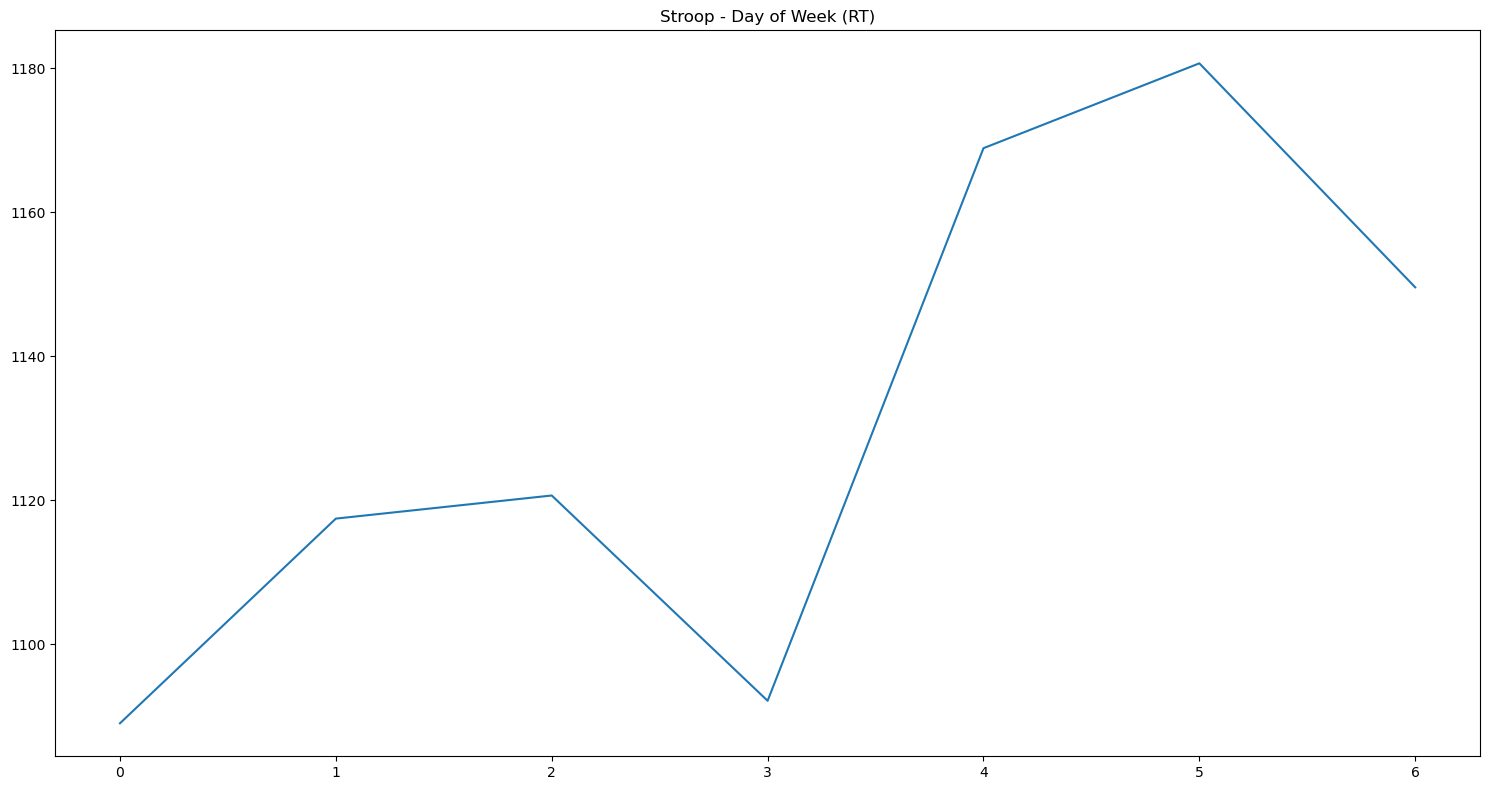

In [29]:
fig = plt.figure(figsize=(15, 8))

stroop_rt_df['Day'] = stroop_rt_df['Date'].dt.dayofweek
stroop_rt_df_grouped = stroop_rt_df.groupby([stroop_rt_df['Day']])['RT'].mean().reset_index()
plt.plot(stroop_rt_df_grouped['Day'], stroop_rt_df_grouped['RT'])
plt.xticks(stroop_rt_df_grouped['Day'])
plt.title("Stroop - Day of Week (RT)")
fig.tight_layout()

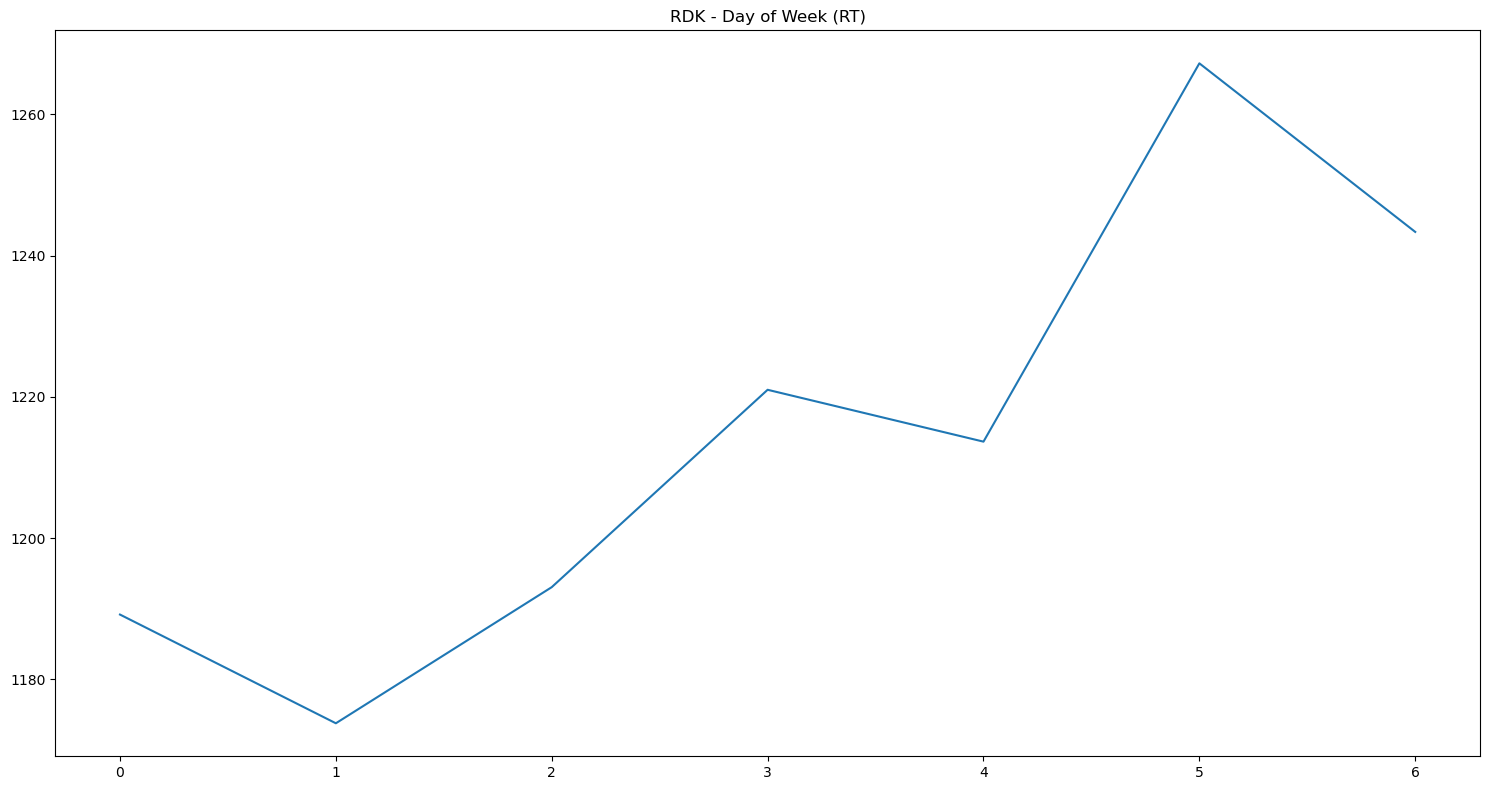

In [28]:
fig = plt.figure(figsize=(15, 8))

rdk_rt_df['Day'] = rdk_rt_df['Date'].dt.dayofweek
rdk_rt_df_grouped = rdk_rt_df.groupby([rdk_rt_df['Day']])['RT'].mean().reset_index()
plt.plot(rdk_rt_df_grouped['Day'], rdk_rt_df_grouped['RT'])
plt.xticks(rdk_rt_df_grouped['Day'])
plt.title("RDK - Day of Week (RT)")
fig.tight_layout()

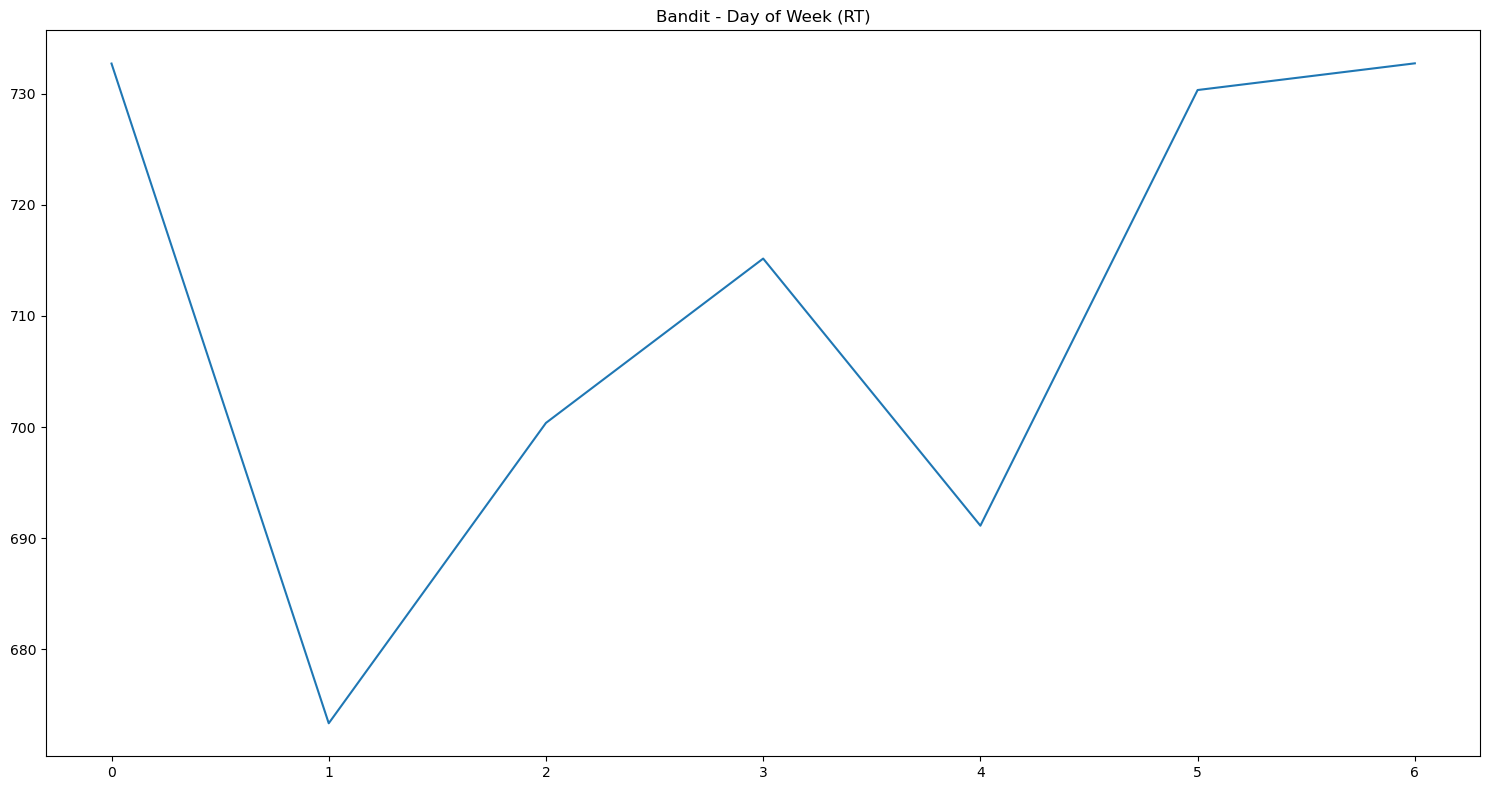

In [30]:
fig = plt.figure(figsize=(15, 8))

bandit_rt_df['Day'] = bandit_rt_df['Date'].dt.dayofweek
bandit_rt_df_grouped = bandit_rt_df.groupby([bandit_rt_df['Day']])['RT'].mean().reset_index()
plt.plot(bandit_rt_df_grouped['Day'], bandit_rt_df_grouped['RT'])
plt.xticks(bandit_rt_df_grouped['Day'])
plt.title("Bandit - Day of Week (RT)")
fig.tight_layout()

In [31]:
# recreating manip datasets

manip_1 = performance_df[performance_df["Manipulation"].str.contains("vanilla")][["RT", "Date"]]
manip_2 = performance_df[performance_df["Manipulation"].str.contains("progress")][["RT", "Date"]]
manip_3 = performance_df[performance_df["Manipulation"].str.contains("eyes")][["RT", "Date"]]
manip_4 = performance_df[performance_df["Manipulation"].str.contains("posneg")][["RT", "Date"]]
manip_5 = performance_df[performance_df["Manipulation"].str.contains("final")][["RT", "Date"]]
manip_6 = performance_df[performance_df["Manipulation"].str.contains("bonus")][["RT", "Date"]]
manip_7 = performance_df[performance_df["Manipulation"].str.contains("video")][["RT", "Date"]]

print(manip_3.head())

              RT                Date
157  1162.749215 2023-03-07 10:23:54
158  1125.182292 2023-03-08 10:02:57
159   956.074346 2023-03-07 10:21:55
160   962.352632 2023-03-07 10:20:07
161  1230.161257 2023-03-07 10:15:36


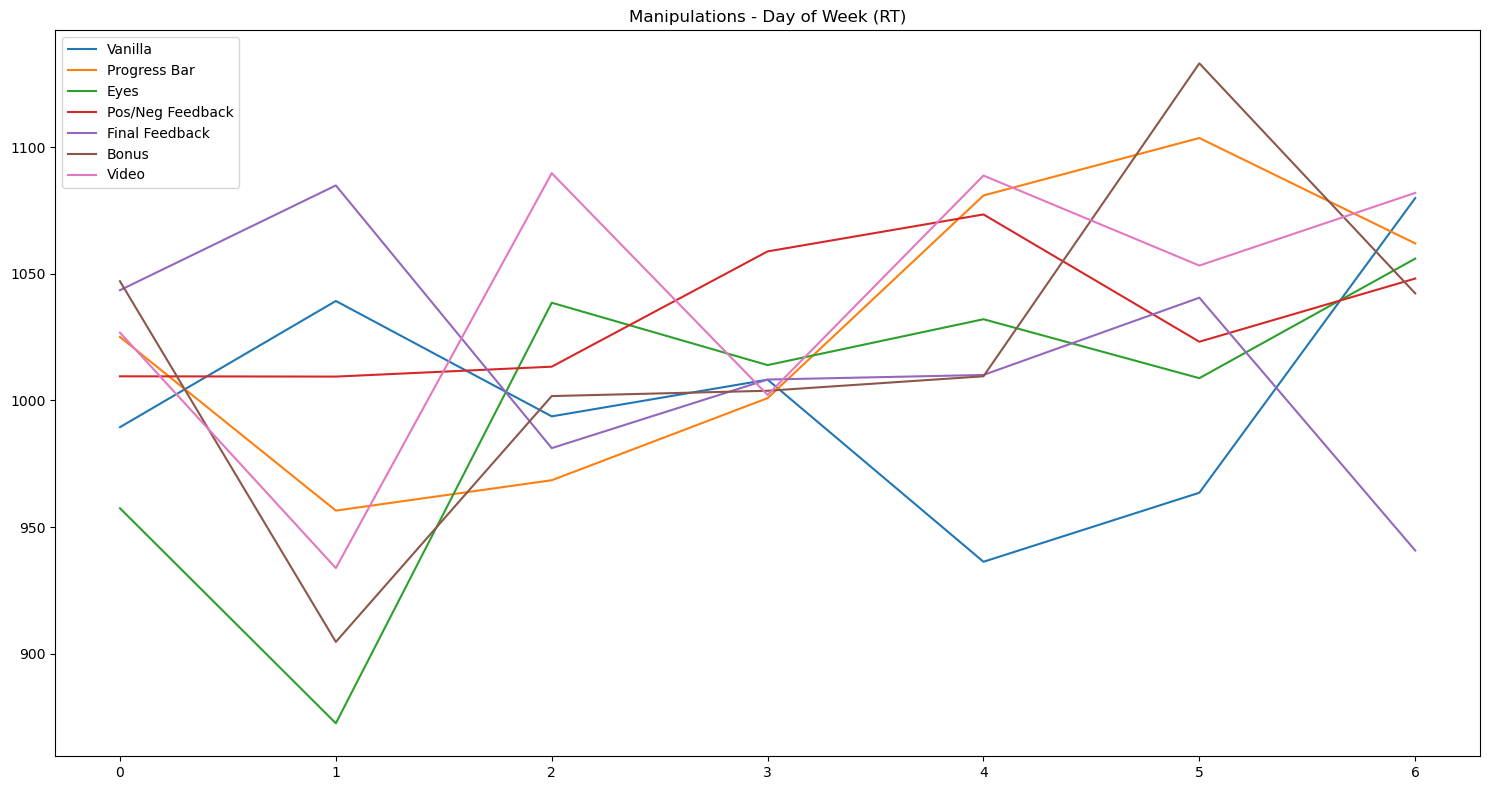

In [33]:
fig = plt.figure(figsize=(15, 8))

manip_1['Day'] = manip_1['Date'].dt.dayofweek
manip_1_grouped = manip_1.groupby([manip_1['Day']])['RT'].mean().reset_index()
plt.plot(manip_1_grouped['Day'], manip_1_grouped['RT'], label='Vanilla')
plt.xticks(manip_1_grouped['Day'])

manip_2['Day'] = manip_2['Date'].dt.dayofweek
manip_2_grouped = manip_2.groupby([manip_2['Day']])['RT'].mean().reset_index()
plt.plot(manip_2_grouped['Day'], manip_2_grouped['RT'], label='Progress Bar')
plt.xticks(manip_2_grouped['Day'])

manip_3['Day'] = manip_3['Date'].dt.dayofweek
manip_3_grouped = manip_3.groupby([manip_3['Day']])['RT'].mean().reset_index()
plt.plot(manip_3_grouped['Day'], manip_3_grouped['RT'], label='Eyes')
plt.xticks(manip_3_grouped['Day'])

manip_4['Day'] = manip_4['Date'].dt.dayofweek
manip_4_grouped = manip_4.groupby([manip_4['Day']])['RT'].mean().reset_index()
plt.plot(manip_4_grouped['Day'], manip_4_grouped['RT'], label='Pos/Neg Feedback')
plt.xticks(manip_4_grouped['Day'])

manip_5['Day'] = manip_5['Date'].dt.dayofweek
manip_5_grouped = manip_5.groupby([manip_5['Day']])['RT'].mean().reset_index()
plt.plot(manip_5_grouped['Day'], manip_5_grouped['RT'], label='Final Feedback')
plt.xticks(manip_5_grouped['Day'])

manip_6['Day'] = manip_6['Date'].dt.dayofweek
manip_6_grouped = manip_6.groupby([manip_6['Day']])['RT'].mean().reset_index()
plt.plot(manip_6_grouped['Day'], manip_6_grouped['RT'], label='Bonus')
plt.xticks(manip_6_grouped['Day'])

manip_7['Day'] = manip_7['Date'].dt.dayofweek
manip_7_grouped = manip_7.groupby([manip_7['Day']])['RT'].mean().reset_index()
plt.plot(manip_7_grouped['Day'], manip_7_grouped['RT'], label='Video')
plt.xticks(manip_7_grouped['Day'])

plt.title("Manipulations - Day of Week (RT)")
plt.legend()
fig.tight_layout()